# POSTTEST 5 KB
# NAMA : FILIPUS ADRIEL MANIK
# NIM  : 2109106096

Note : 

Dataset kemarin saya ganti bang, karena datanya kebanyakan, dan ng training datanya lama banget, jadi saya ganti bang, pakai dataset "Credit card Details Binary Classification Problem"

Import Liblary yang diperlukan


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

# Unlabelled data metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score # SDB-CH

# Labelled data metrics
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

### Membaca 2 dataset yang satu untuk feature, dan satu lagi untuk label atau target

In [22]:
df = pd.read_csv('Credit_card.csv')
df_label = pd.read_csv('Credit_card_label.csv')

### Melihat jenis dan tipe data dari tabel feature dan tabel target

In [23]:
df.info()
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

### Melihat isi 10 data pertama dari tabel feature 

In [24]:
df.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3


### Mengecek Korelasi antara kolom feature

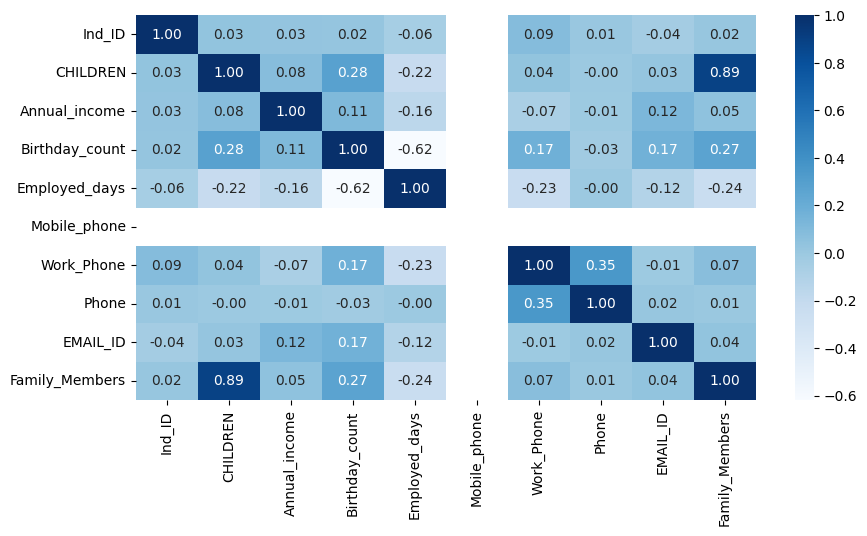

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues', fmt='.2f')
plt.show()


### Data Cleaning

1. Mengecek nilai null
2. Encoding data kategorikal
3. Mengatasi nilai null dalam kolom Gender, Annual_income, dan jugga Birthday_count
4. Men-Standarisasi kolom Birtday_count, Employed_days, dan Annual_income menggunakan MinMaxScaler

In [27]:
df.isna().sum()
# Drop kolom yang tidak akan diapakai untuk prediksi
df.drop(['Ind_ID'], axis=1, inplace=True)
# Encode kolom yang kategorikal
min_max_scaler = MinMaxScaler()
df[['Birthday_count', 'Employed_days', 'Annual_income']] = min_max_scaler.fit_transform(df[['Birthday_count', 'Employed_days','Annual_income']])


df["Annual_income"].fillna(df["Annual_income"].mean(), inplace=True)
df["GENDER"].fillna(df["GENDER"].mode()[0], inplace=True)
df["Type_Occupation"].fillna(df["GENDER"].mode()[0], inplace=True)
df["Birthday_count"].fillna(df["Birthday_count"].mode()[0], inplace=True)
col = ['GENDER', 'Car_Owner','Propert_Owner','Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df.head(10)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,1,1,1,0,0.094891,1,1,1,1,0.358100,1.000000,1,0,0,0,5,2
1,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
2,0,1,0,0,0.182482,0,1,1,1,0.132881,0.037621,1,1,1,0,5,2
3,0,1,0,0,0.102287,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
4,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
5,0,1,0,0,0.182482,1,1,1,1,0.660577,0.037621,1,1,1,0,5,2
6,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
7,0,0,0,0,0.094891,1,4,1,1,0.163100,1.000000,1,0,0,0,5,2
8,1,1,1,1,0.270073,0,4,1,1,0.392843,0.037379,1,0,1,1,3,3
9,1,1,1,1,0.270073,1,4,1,1,0.392843,0.037379,1,0,1,1,3,3


## A. Supervised Learning

### A1. SVC (Support Vector Classifier)

1. Menggunakan feature =>  Employed_days, Annual_income
2. Menggunakan target  =>  label

In [31]:
# Memisahkan atribut dan label
X = df[['Employed_days', 'Annual_income']]
y = df_label['label']

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Membuat model SVC dan melatihnya dengan data training
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)

# Memprediksi data testing
y_pred = svm.predict(X_test)

# Menyimpan nilai Support Vectors & Indexnya
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

### A2. Evaluasi Hasil Prediksi 

Confusion Matrix SVM

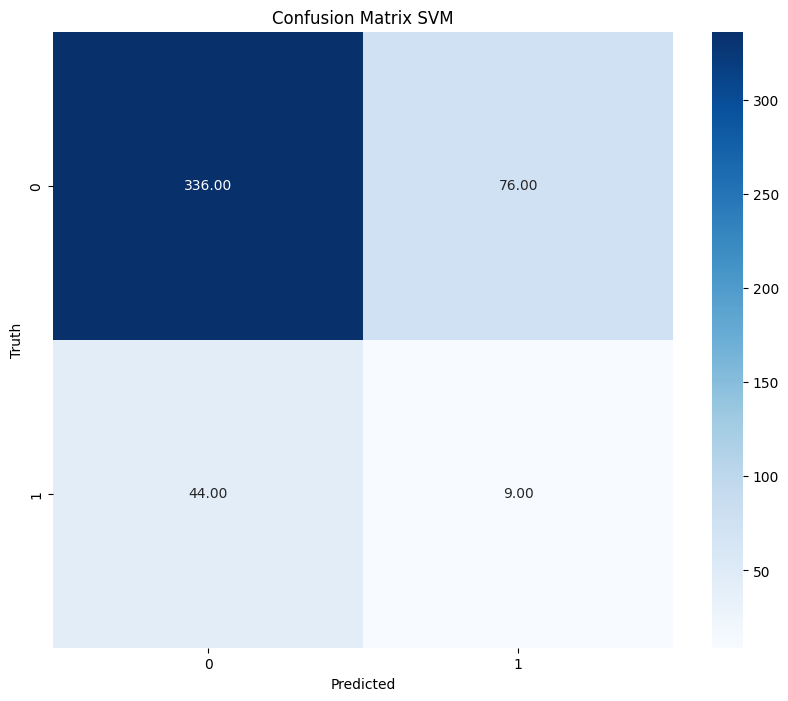

In [32]:
svm_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

Classification Report SVM

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       412
           1       0.11      0.17      0.13        53

    accuracy                           0.74       465
   macro avg       0.50      0.49      0.49       465
weighted avg       0.80      0.74      0.77       465



Plotting data yang di prdiksi dengan menggunakan Scatter Plot

c:\Users\nabil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


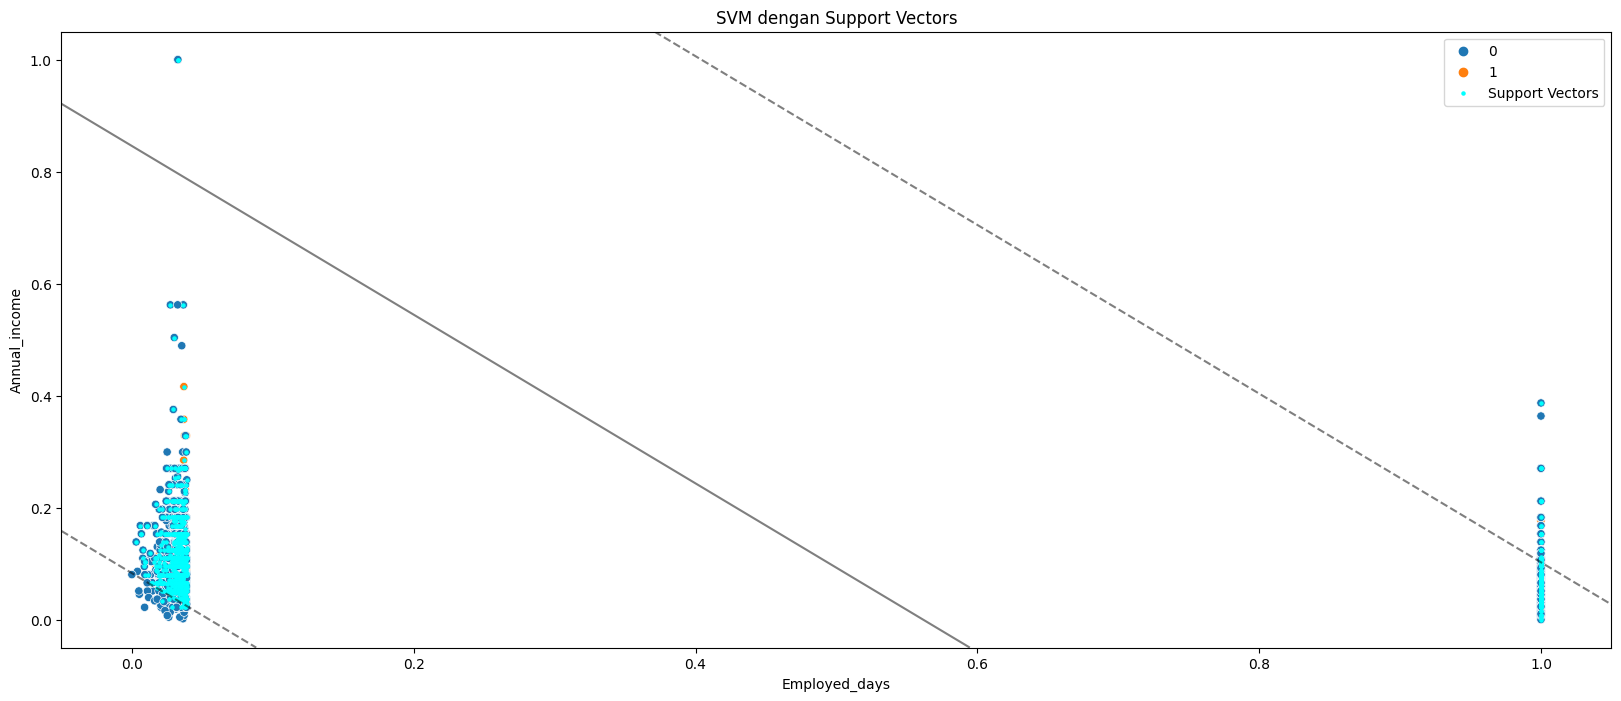

In [36]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='Employed_days', y='Annual_income', data=df, hue=df_label['label'])

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=5, color='cyan', marker='o', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x

# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Employed_days')
plt.ylabel('Annual_income')
plt.legend(loc='upper right')
plt.title('SVM dengan Support Vectors')
plt.show()

### RANDOM FOREST CLASSIFIER

In [37]:
rfc = RandomForestClassifier(n_estimators=500, random_state=42)

X = df
y = df_label['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Evaluasi hasil prdiksi

Confusion Matrix Random Forest

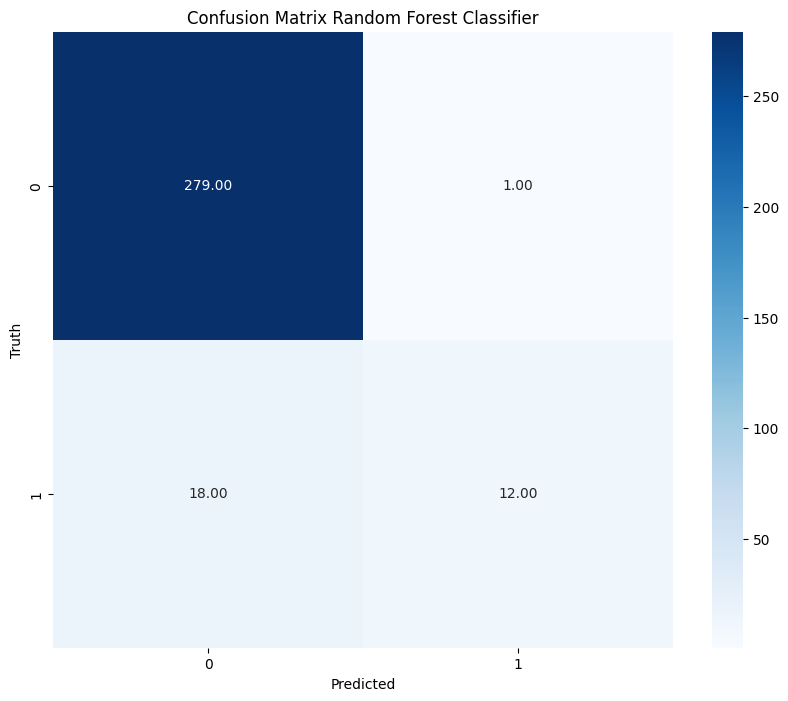

In [38]:
rfc_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Random Forest Classifier')
plt.show()

Classification Report Random Forest

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       0.92      0.40      0.56        30

    accuracy                           0.94       310
   macro avg       0.93      0.70      0.76       310
weighted avg       0.94      0.94      0.93       310



# B. Unsupervised Learning
### B1. K-Means Clustering

In [47]:
df2 = pd.read_csv('Credit_card.csv')
df2_label = pd.read_csv('Credit_card_label.csv')

df2.isna().sum()
# Drop kolom yang tidak akan diapakai untuk prediksi
df2.drop(['Ind_ID'], axis=1, inplace=True)
# Encode kolom yang kategorikal
min_max_scaler = MinMaxScaler()
df2[['Birthday_count', 'Employed_days', 'Annual_income']] = min_max_scaler.fit_transform(df2[['Birthday_count', 'Employed_days','Annual_income']])


df2["Annual_income"].fillna(df2["Annual_income"].mean(), inplace=True)
df2["GENDER"].fillna(df2["GENDER"].mode()[0], inplace=True)
df2["Type_Occupation"].fillna(df2["GENDER"].mode()[0], inplace=True)
df2["Birthday_count"].fillna(df2["Birthday_count"].mode()[0], inplace=True)
col = ['GENDER', 'Car_Owner','Propert_Owner','Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
le=LabelEncoder()
for i in col:
    df2[i]=le.fit_transform(df2[i])
df2.head(10)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,1,1,1,0,0.094891,1,1,1,1,0.358100,1.000000,1,0,0,0,5,2
1,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
2,0,1,0,0,0.182482,0,1,1,1,0.132881,0.037621,1,1,1,0,5,2
3,0,1,0,0,0.102287,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
4,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
5,0,1,0,0,0.182482,1,1,1,1,0.660577,0.037621,1,1,1,0,5,2
6,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
7,0,0,0,0,0.094891,1,4,1,1,0.163100,1.000000,1,0,0,0,5,2
8,1,1,1,1,0.270073,0,4,1,1,0.392843,0.037379,1,0,1,1,3,3
9,1,1,1,1,0.270073,1,4,1,1,0.392843,0.037379,1,0,1,1,3,3


In [48]:
X = df2[['Employed_days', 'Annual_income']]
K = 2 # Diambil dari jumlah target

kmeans = KMeans(n_clusters=K, n_init=10, init='k-means++', random_state=42) 
kmeans.fit(X)

cluster_labels = kmeans.labels_
df2["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {1 : 0, 0: 1}
df2['cluster'] = df2['cluster'].map(cluster_mapping)

### Evaluasi Hasil Clustering

A. TANPA LABEL

In [49]:
# Silhouette Score
ss_score = silhouette_score(X, df2['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, df2['cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, df2['cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.93
Davies-Bouldin Index: 0.09
Calinski-Harabasz Index: 38974.36


A2. DENGAN LABEL

In [51]:
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df2["cluster"], df2_label["label"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df2_label["label"], df2['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df2_label['label'], df2['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(df2_label["label"], df2['cluster'])
completeness = completeness_score(df2_label["label"], df2['cluster'])
v_measure = v_measure_score(df2_label["label"], df2['cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
label       0    1
cluster           
0         226   35
1        1147  140 

Adjusted Rand Index (ARI): 0.02
Normalized Mutual Information (NMI): 0.00
Homogeneity Score: 0.00
Completeness Score: 0.00
V-Measure Score: 0.00


Plotting hasil Clustering, menggunakan Scatter Plot

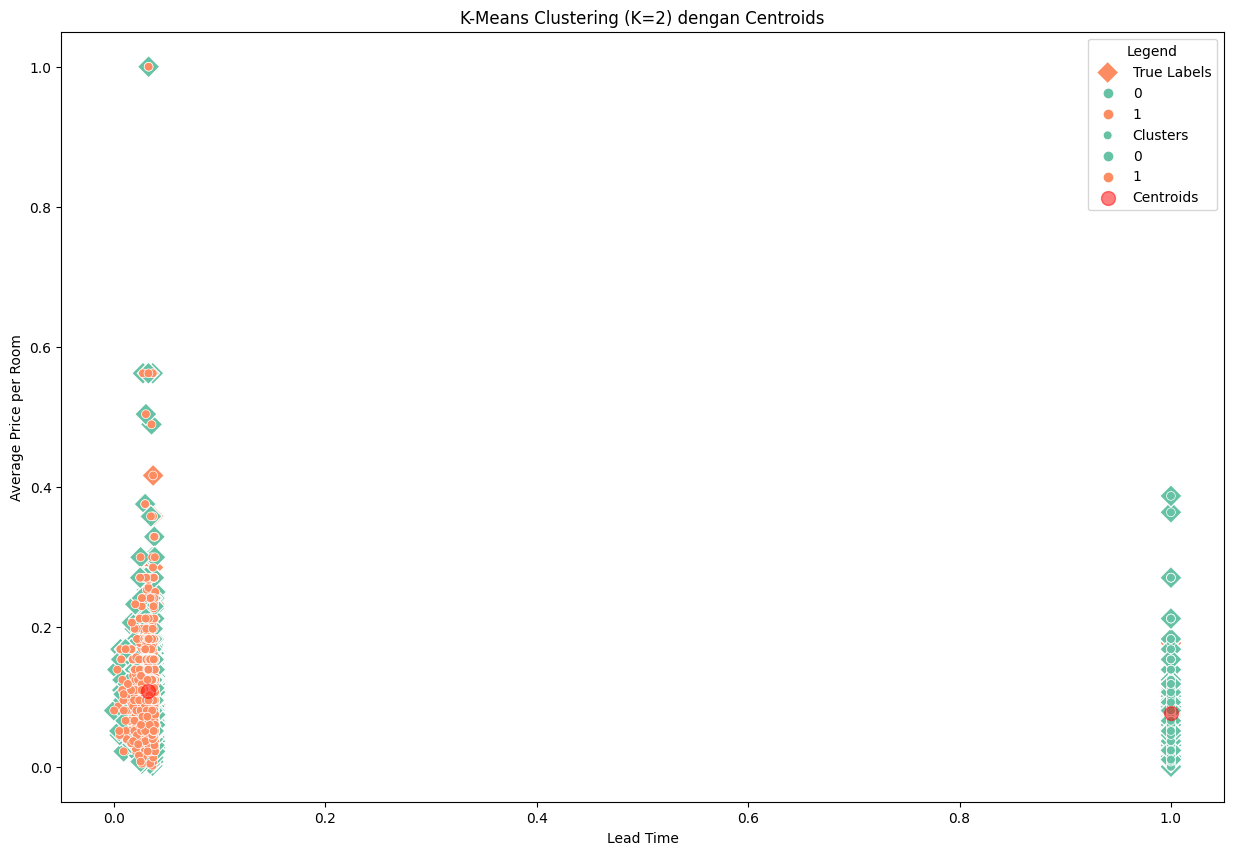

In [52]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df2, x="Employed_days", y="Annual_income", hue=df2_label["label"], palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=df2, x="Employed_days", y="Annual_income", hue="cluster", palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Lead Time")
plt.ylabel("Average Price per Room")
plt.legend(title="Legend", loc="upper right")
plt.show()